In [148]:
'''first, let's import libraries '''

import numpy as np
import matplotlib.pyplot as plt
import io
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [149]:
#path = '/content/drive/My Drive/EuropHeight_samples/Babol_Height_R1.csv'
path = '/content/drive/My Drive/EuropHeight_samples/Stockholm_Height_Asc_Desc_100000.csv'
Table0 = pd.read_csv(path)
#print(Table0)
#print(Table0.head())
#Table0.info()
Table0 = Table0[['HH_A1','HH_A2','HH_A3','HH_A4','HH_D1','HH_D2','HH_D3','HH_D4','HV_A1','HV_A2','HV_A3','HV_A4','HV_D1','HV_D2','HV_D3',
                 'HV_D4','VH_A1','VH_A2','VH_D1','VH_D2','VV_A1','VV_A2',	'VV_D1','VV_D2','U1' ,'U2' ,'U3' ,'U4' ,'NL' ,'Height' ]].dropna()
#Table0.value_counts()   # Categorical data

In [150]:
#AllData = pd.concat([Table0, Table1, Table2, Table3, Table4, Table5])
AllData = Table0
AllData.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
HH_A1,HH_A2,HH_A3,HH_A4,HH_D1,HH_D2,HH_D3,HH_D4,HV_A1,HV_A2,HV_A3,HV_A4,HV_D1,HV_D2,HV_D3,HV_D4,VH_A1,VH_A2,VH_D1,VH_D2,VV_A1,VV_A2,VV_D1,VV_D2,U1,U2,U3,U4,NL,Height,
5.930736,2.933850,1.042074,3.698829,6.282114,16.653551,9.125519,12.885382,4.833598,-1.431168,-3.449353,5.418659,-8.627577,-10.431855,-8.292115,-8.482420,13.080886,6.153002,-7.194627,-11.053241,5.863778,1.829477,7.350261,7.216917,0.888889,0.927445,0.846262,0.727128,54.606667,23,2
-5.379267,-6.146702,-5.834783,-5.811313,-5.481468,-4.419905,-4.761790,-5.251812,-14.819033,-14.482858,-16.081123,-13.917543,-14.835898,-12.381328,-12.936800,-13.755489,-16.534628,-15.142561,-14.532882,-13.102694,-10.276547,-10.456848,-7.269126,-7.627877,0.037037,0.056782,0.077574,0.077963,25.110832,11,2
8.472555,9.548075,2.176956,7.803293,-0.290162,4.245413,0.591015,0.839872,-9.311794,-10.059135,-10.673540,-7.232792,-7.916493,-2.352306,-6.216148,-5.062982,-8.793565,-0.484093,-9.260839,-6.640325,6.004629,7.507885,-4.111693,-5.475280,0.925926,0.880126,0.792666,0.752586,58.264999,23,2
-2.895199,-6.277068,-2.044257,-6.041013,-5.648584,-3.625244,-4.510242,-0.369189,-15.888655,-16.356916,-17.008717,-15.522102,-14.901546,-12.393734,-14.496019,-15.044045,-16.029791,-16.393396,-10.253186,-13.919844,-11.707279,-6.586640,-5.776811,-6.386332,0.296296,0.211356,0.210155,0.210024,13.401667,6,2
-3.927213,-4.989035,-5.799638,-3.388200,-8.645041,-8.094310,-3.827214,-6.194108,-9.215034,-13.031731,-10.604430,-11.905026,-14.769842,-15.369576,-14.320757,-14.289970,-10.772860,-11.391017,-17.129229,-12.689164,-8.389543,-5.480639,-11.446020,-2.805303,0.308642,0.145110,0.146685,0.154336,35.462502,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4.267473,-6.697228,-7.419666,-4.638516,-4.644304,-3.296313,-5.154125,-4.036529,-8.781212,-10.369098,-10.701623,-10.095130,-10.061105,-11.875150,-9.752946,-11.210654,-4.192473,-7.053634,-11.026319,-9.048094,-1.569433,-0.176731,-4.300702,-4.750473,0.555556,0.564669,0.517630,0.417661,30.222500,15,1
-4.267663,-6.058405,-5.172709,-5.521809,-8.057126,-5.221987,-6.083634,-4.645379,-11.380018,-11.825988,-6.179551,-11.506774,-13.501732,-12.118499,-11.526007,-10.325001,-9.076764,-9.300220,-4.909905,-6.737379,-3.415420,-6.145824,-2.251624,-3.434965,0.320988,0.220820,0.170663,0.182180,26.126667,14,1
-4.271664,-4.557260,-3.286150,-4.036849,2.079347,0.166919,-0.419908,3.186514,-10.214518,-11.909514,-13.082665,-11.322366,-14.714215,-11.921180,-12.163646,-12.791869,-7.467062,-11.955299,-10.138377,-10.901543,-2.735966,-5.365832,0.275104,-0.943006,0.074074,0.205047,0.198872,0.228321,22.111668,7,1


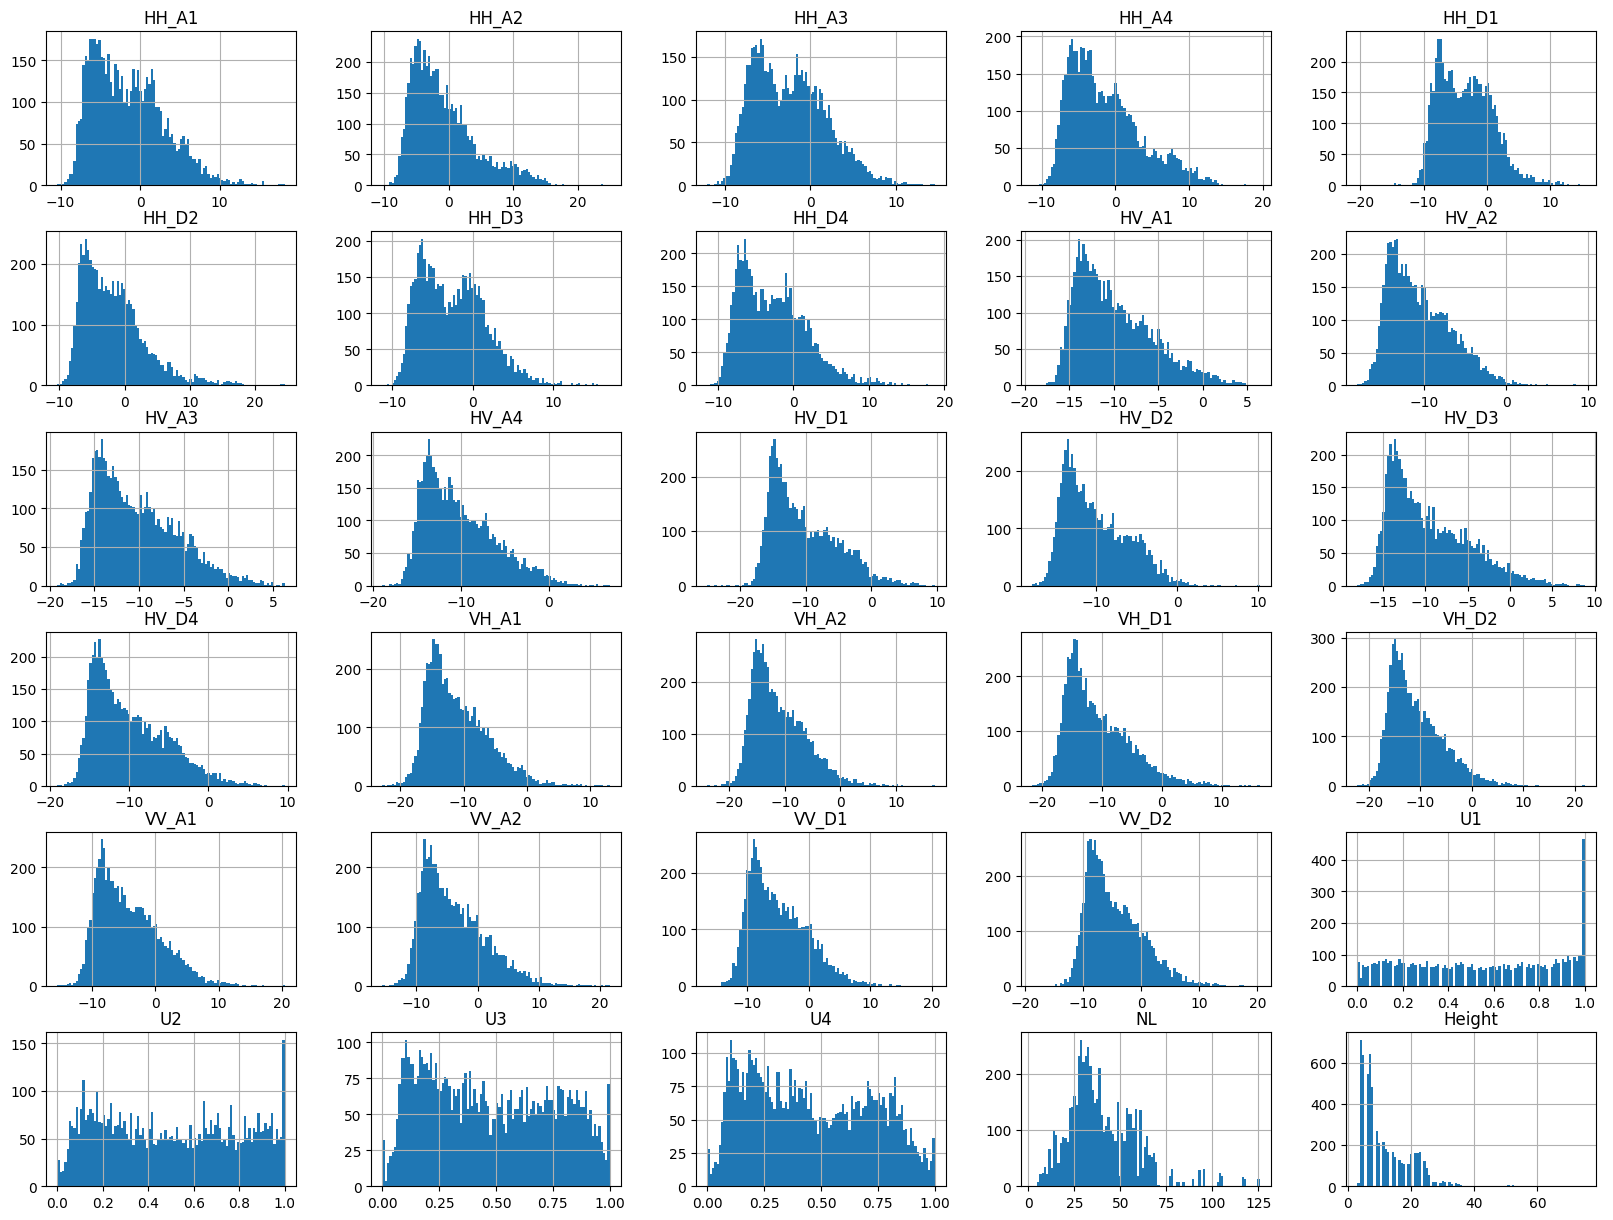

In [151]:
import matplotlib.pyplot as plt
AllData.hist(bins=100, figsize=(20,15))
plt.show()

# Split Dataset into train and test sections

In [152]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [153]:
## Feature X1
X = AllData[['VV_A1']]
## Feature X2
#X = AllData[['VV_A1','VH_A1']]
## Feature X3
#X = AllData[['VV_A1','VV_D1']]
## Feature X4
#X = AllData[['VV_A1','VH_A1','VV_D1', 'VH_D1']]
## Feature X5
#X = AllData[['HH_A1','HH_A2','HH_A3','HH_A4','HH_D1','HH_D2','HH_D3','HH_D4','HV_A1','HV_A2','HV_A3','HV_A4','HV_D1','HV_D2','HV_D3','HV_D4','VH_A1','VH_A2','VH_D1','VH_D2','VV_A1','VV_A2',	'VV_D1','VV_D2']]
## Feature X6
#X = AllData[['HH_A1','HH_A2','HH_A3','HH_A4','HH_D1','HH_D2','HH_D3','HH_D4','HV_A1','HV_A2','HV_A3','HV_A4','HV_D1','HV_D2','HV_D3','HV_D4','VH_A1','VH_A2','VH_D1','VH_D2','VV_A1','VV_A2',	'VV_D1','VV_D2', 'U1']]
## Feature X7
#X = AllData[['HH_A1','HH_A2','HH_A3','HH_A4','HH_D1','HH_D2','HH_D3','HH_D4','HV_A1','HV_A2','HV_A3','HV_A4','HV_D1','HV_D2','HV_D3','HV_D4','VH_A1','VH_A2','VH_D1','VH_D2','VV_A1','VV_A2',	'VV_D1','VV_D2', 'U1', 'U2', 'U3', 'U4']]
## Feature X8
#X = AllData[['HH_A1','HH_A2','HH_A3','HH_A4','HH_D1','HH_D2','HH_D3','HH_D4','HV_A1','HV_A2','HV_A3','HV_A4','HV_D1','HV_D2','HV_D3','HV_D4','VH_A1','VH_A2','VH_D1','VH_D2','VV_A1','VV_A2',	'VV_D1','VV_D2', 'U1', 'NL']]
## Feature X9
#X = AllData[['HH_A1','HH_A2','HH_A3','HH_A4','HH_D1','HH_D2','HH_D3','HH_D4','HV_A1','HV_A2','HV_A3','HV_A4','HV_D1','HV_D2','HV_D3','HV_D4','VH_A1','VH_A2','VH_D1','VH_D2','VV_A1','VV_A2',	'VV_D1','VV_D2', 'U1', 'U2', 'U3', 'U4', 'NL']]

Y = AllData[['Height']]

Call Accracy assessment libraries

In [154]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Linear Regression with Ordinary Least Squares

In [155]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [156]:
cv_results = cross_validate(reg, X, Y, cv=kf, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','r2'])
print("MSE for each fold: ", -cv_results['test_neg_mean_squared_error'])
print("R2 score for each fold: ", cv_results['test_r2'])
#print("Average MSE: ", -cv_results['test_neg_mean_squared_error'].mean())
#print("StD MSE: ", cv_results['test_neg_mean_squared_error'].std())
print("Average R2 score: ", cv_results['test_r2'].mean())
print("StD R2 score: ", cv_results['test_r2'].std())
print("Average MAE: ", -cv_results['test_neg_mean_absolute_error'].mean())
print("StD MAE: ", cv_results['test_neg_mean_absolute_error'].std())

MSE for each fold:  [47.93407639 47.69139722 43.95962399 42.25824467 46.63825689]
R2 score for each fold:  [0.23385429 0.23687337 0.22937235 0.23984081 0.22572965]
Average R2 score:  0.2331340951240845
StD R2 score:  0.005068677490936408
Average MAE:  4.907207137656663
StD MAE:  0.1373799628815909


# Ridge regression

In [157]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)

In [158]:
cv_results = cross_validate(reg, X, Y, cv=kf, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','r2'])
print("MSE for each fold: ", -cv_results['test_neg_mean_squared_error'])
print("R2 score for each fold: ", cv_results['test_r2'])
#print("Average MSE: ", -cv_results['test_neg_mean_squared_error'].mean())
#print("StD MSE: ", cv_results['test_neg_mean_squared_error'].std())
print("Average R2 score: ", cv_results['test_r2'].mean())
print("StD R2 score: ", cv_results['test_r2'].std())
print("Average MAE: ", -cv_results['test_neg_mean_absolute_error'].mean())
print("StD MAE: ", cv_results['test_neg_mean_absolute_error'].std())

MSE for each fold:  [47.93407756 47.69140316 43.95962112 42.25824473 46.63825244]
R2 score for each fold:  [0.23385428 0.23687328 0.2293724  0.23984081 0.22572972]
Average R2 score:  0.2331340970026145
StD R2 score:  0.005068633591003197
Average MAE:  4.907209869778234
StD MAE:  0.13737995061470684


# Support Vector Regression- Linear

In [159]:
 from sklearn.svm import SVR
 reg = SVR(kernel='linear')

In [160]:
cv_results = cross_validate(reg, X, Y, cv=kf, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','r2'])
print("MSE for each fold: ", -cv_results['test_neg_mean_squared_error'])
print("R2 score for each fold: ", cv_results['test_r2'])
#print("Average MSE: ", -cv_results['test_neg_mean_squared_error'].mean())
#print("StD MSE: ", cv_results['test_neg_mean_squared_error'].std())
print("Average R2 score: ", cv_results['test_r2'].mean())
print("StD R2 score: ", cv_results['test_r2'].std())
print("Average MAE: ", -cv_results['test_neg_mean_absolute_error'].mean())
print("StD MAE: ", cv_results['test_neg_mean_absolute_error'].std())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

MSE for each fold:  [49.49526722 49.1417682  45.24604503 43.77667417 48.03360678]
R2 score for each fold:  [0.20890128 0.21366548 0.20682093 0.21252666 0.20256459]
Average R2 score:  0.20889578920555488
StD R2 score:  0.004008050004652437
Average MAE:  4.74090275651613
StD MAE:  0.14394486448162958


# Neural network

In [161]:
from sklearn import neural_network
reg = neural_network.MLPRegressor()

In [162]:
cv_results = cross_validate(reg, X, Y, cv=kf, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','r2'])
print("MSE for each fold: ", -cv_results['test_neg_mean_squared_error'])
print("R2 score for each fold: ", cv_results['test_r2'])
#print("Average MSE: ", -cv_results['test_neg_mean_squared_error'].mean())
#print("StD MSE: ", cv_results['test_neg_mean_squared_error'].std())
print("Average R2 score: ", cv_results['test_r2'].mean())
print("StD R2 score: ", cv_results['test_r2'].std())
print("Average MAE: ", -cv_results['test_neg_mean_absolute_error'].mean())
print("StD MAE: ", cv_results['test_neg_mean_absolute_error'].std())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed w

MSE for each fold:  [47.3481004  45.93820324 41.69561825 40.10114146 43.67575673]
R2 score for each fold:  [0.24322014 0.26492684 0.26906116 0.2786437  0.27491194]
Average R2 score:  0.26615275408220074
StD R2 score:  0.012398496170465777
Average MAE:  4.742782151645965
StD MAE:  0.16042383209038943


# Gradient Boosting Regressor

In [163]:
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor()

In [164]:
cv_results = cross_validate(reg, X, Y, cv=kf, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','r2'])
print("MSE for each fold: ", -cv_results['test_neg_mean_squared_error'])
print("R2 score for each fold: ", cv_results['test_r2'])
#print("Average MSE: ", -cv_results['test_neg_mean_squared_error'].mean())
#print("StD MSE: ", cv_results['test_neg_mean_squared_error'].std())
print("Average R2 score: ", cv_results['test_r2'].mean())
print("StD R2 score: ", cv_results['test_r2'].std())
print("Average MAE: ", -cv_results['test_neg_mean_absolute_error'].mean())
print("StD MAE: ", cv_results['test_neg_mean_absolute_error'].std())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

MSE for each fold:  [47.78997076 48.08058449 43.33382339 40.34027938 44.02231128]
R2 score for each fold:  [0.23615758 0.23064585 0.24034285 0.27434198 0.26915857]
Average R2 score:  0.2501293673848533
StD R2 score:  0.017994195022810713
Average MAE:  4.768105131567404
StD MAE:  0.16140348850469804


# Random Forest Regressor

In [165]:
from sklearn import ensemble
reg = ensemble.RandomForestRegressor(max_depth=5)

In [166]:
cv_results = cross_validate(reg, X, Y, cv=kf, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','r2'])
print("MSE for each fold: ", -cv_results['test_neg_mean_squared_error'])
print("R2 score for each fold: ", cv_results['test_r2'])
#print("Average MSE: ", -cv_results['test_neg_mean_squared_error'].mean())
#print("StD MSE: ", cv_results['test_neg_mean_squared_error'].std())
print("Average R2 score: ", cv_results['test_r2'].mean())
print("StD R2 score: ", cv_results['test_r2'].std())
print("Average MAE: ", -cv_results['test_neg_mean_absolute_error'].mean())
print("StD MAE: ", cv_results['test_neg_mean_absolute_error'].std())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

MSE for each fold:  [47.28165174 47.2714728  42.10597561 40.11228233 43.96712098]
R2 score for each fold:  [0.24428221 0.24359273 0.26186745 0.27844329 0.27007482]
Average R2 score:  0.25965209977174186
StD R2 score:  0.013862081994589062
Average MAE:  4.743589991260611
StD MAE:  0.15687609441380818


# Voting Regressor

In [167]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(max_depth=5, random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])

In [168]:
cv_results = cross_validate(ereg, X, Y, cv=kf, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','r2'])
print("MSE for each fold: ", -cv_results['test_neg_mean_squared_error'])
print("R2 score for each fold: ", cv_results['test_r2'])
#print("Average MSE: ", -cv_results['test_neg_mean_squared_error'].mean())
#print("StD MSE: ", cv_results['test_neg_mean_squared_error'].std())
print("Average R2 score: ", cv_results['test_r2'].mean())
print("StD R2 score: ", cv_results['test_r2'].std())
print("Average MAE: ", -cv_results['test_neg_mean_absolute_error'].mean())
print("StD MAE: ", cv_results['test_neg_mean_absolute_error'].std())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

MSE for each fold:  [46.90788949 46.67167572 42.50807508 40.3800884  44.22385297]
R2 score for each fold:  [0.25025617 0.25319029 0.25481851 0.27362588 0.26581265]
Average R2 score:  0.25954070053016254
StD R2 score:  0.008792712503095827
Average MAE:  4.778612337624747
StD MAE:  0.1474356211766484
